In [1]:
%pip install git+https://github.com/Pedro-HFelix/IA.git
!pip install graphviz

  Cloning https://github.com/Pedro-HFelix/IA.git to /private/var/folders/xw/7_chx6gd3dxd7s10j71hxp_w0000gn/T/pip-req-build-b0u_m80t
  Running command git clone --filter=blob:none --quiet https://github.com/Pedro-HFelix/IA.git /private/var/folders/xw/7_chx6gd3dxd7s10j71hxp_w0000gn/T/pip-req-build-b0u_m80t
  Resolved https://github.com/Pedro-HFelix/IA.git to commit 39c744e85172570f8dc2b487a70d5c8e05071cda
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
Note: you may need to restart the kernel to use updated packages.
zsh:1: command not found: pip


In [2]:
from trees_classifiers.ID3 import DecisionTreeID3
from trees_classifiers.C45 import DecisionTreeC45
from trees_classifiers.CART import DecisionTreeCART

from trees_classifiers.ID3 import DecisionTreeID3
import pandas as pd
import graphviz
import itertools
import pickle
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [3]:

def plot_tree(tree, feature_names):

    dot = graphviz.Digraph(comment='Decision Tree', format='png')
    dot.attr('node', shape='box', style='rounded') 
    
    node_id_generator = itertools.count()
    
    def add_nodes_edges(node, parent_id=None, edge_label=""):
        if not isinstance(node, dict):
            node_id = next(node_id_generator)
            dot.node(str(node_id), label=str(node), shape='ellipse')
            if parent_id is not None:
                dot.edge(str(parent_id), str(node_id), label=edge_label)
            return

        feature = next(iter(node))
        
        node_id = next(node_id_generator)
        dot.node(str(node_id), label=str(feature))
        
        if parent_id is not None:
            dot.edge(str(parent_id), str(node_id), label=edge_label)
        
        for branch, subtree in node[feature].items():
            add_nodes_edges(subtree, parent_id=node_id, edge_label=str(branch))

    add_nodes_edges(tree)
    
    return dot

In [4]:
with open('Titanic.pkl', 'rb') as f:
    X_train, X_test, y_train, y_test = pickle.load(f)

train_data = pd.concat([X_train, y_train], axis=1)
features = list(X_train.columns)
target = y_train.name



In [6]:
print("--- Algoritmo ID3 ---")
model_id3 = DecisionTreeID3(data=train_data, features=features, target_class=target)
model_id3.build()

test_samples = X_test.to_dict(orient='records')
y_pred = [model_id3.predict(sample) for sample in test_samples]

print("\n--- Métricas de Avaliação para o Modelo ID3 no Titanic ---")
print(f"Acurácia: {accuracy_score(y_test, y_pred):.4f}")
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))
print("\nMatriz de Confusão:")
print(confusion_matrix(y_test, y_pred))

#id3_tree_graph = plot_tree(model_id3.tree, features)
#id3_tree_graph

--- Algoritmo ID3 ---

--- Métricas de Avaliação para o Modelo ID3 no Titanic ---


ValueError: Classification metrics can't handle a mix of binary and unknown targets

--- Algoritmo C4.5 ---


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/trees_classifiers/C45.py:30: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(mode_val, inplace=True)


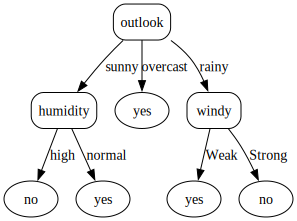

In [17]:
print("--- Algoritmo C4.5 ---")
model_c45 = DecisionTreeC45(data=data, features=features, target_class=target)
model_c45.build()

c45_tree_graph = plot_tree(model_c45.tree, features)
c45_tree_graph

--- Algoritmo CART ---


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/trees_classifiers/CART.py:38: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[feature].fillna(mode_val, inplace=True)


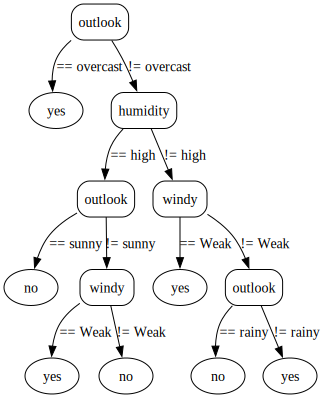

In [18]:
print("--- Algoritmo CART ---")
model_cart = DecisionTreeCART(data=data, features=features, target_class=target)
model_cart.build()


cart_tree_graph = plot_tree(model_cart.tree, features)
cart_tree_graph
